In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_raw=pd.read_csv('./data/BRCA1_HUMAN_Findlay_2018.csv')


In [3]:
data_raw.head(5)

,mutant,mutated_sequence,DMS_score,DMS_score_bin
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0


In [4]:
data_raw.shape

(1837, 4)

In [5]:
data_raw

,mutant,mutated_sequence,DMS_score,DMS_score_bin
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0
...,...,...,...,...
1832,I1855R,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.464328,1
1833,I1855M,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.021941,1
1834,I1855L,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.233297,1
1835,I1855K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.863844,1


In [6]:
df=data_raw.copy()


In [8]:
df['position']=df['mutant'].apply(get_number_from_text)
df.head()

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0,1
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0,1
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0,1
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0,1
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0,1


In [7]:
import re 

def get_number_from_text(text):
    return re.findall(r'\d{1,4}',text)[0]

In [9]:
get_number_from_text('A10B')

'10'

In [10]:
df

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0,1
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0,1
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0,1
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0,1
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0,1
...,...,...,...,...,...
1832,I1855R,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.464328,1,1855
1833,I1855M,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.021941,1,1855
1834,I1855L,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.233297,1,1855
1835,I1855K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.863844,1,1855


In [11]:
df_g = df.groupby(by=['position', 'DMS_score_bin']).apply(lambda x: x['DMS_score_bin'] == 1)

In [12]:
df_g

position  DMS_score_bin     
1         0              0      False
                         1      False
                         2      False
                         3      False
                         4      False
                                ...  
98        1              566     True
                         567     True
                         568     True
                         570     True
99        1              571     True
Name: DMS_score_bin, Length: 1837, dtype: bool

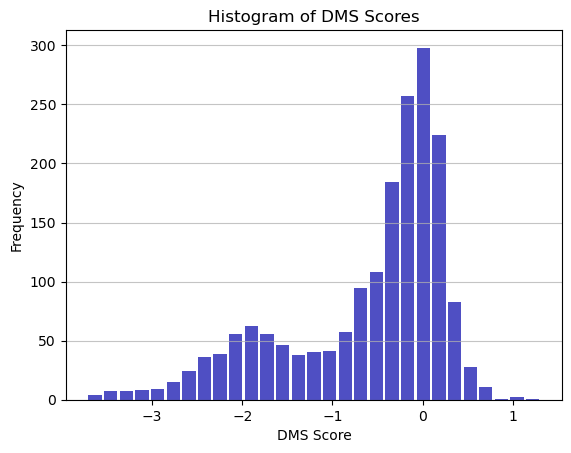

In [20]:
dms_scores = data_raw['DMS_score']
n, bins, patches = plt.hist(x=dms_scores, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)

# Add labels and title
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Histogram of DMS Scores')

# Add a grid
plt.grid(axis='y', alpha=0.75)

# Show the histogram
plt.show()

In [23]:
print(data_raw.columns)

Index(['mutant', 'mutated_sequence', 'DMS_score', 'DMS_score_bin',
       'dms_score_normalized'],
      dtype='object')


In [28]:
data_raw

,mutant,mutated_sequence,DMS_score,DMS_score_bin,dms_score_normalized
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0,0.242003
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0,0.336824
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0,0.410270
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0,0.246092
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0,0.239137
...,...,...,...,...,...
1832,I1855R,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.464328,1,0.647526
1833,I1855M,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.021941,1,0.744294
1834,I1855L,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.233297,1,0.786354
1835,I1855K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.863844,1,0.568022


In [29]:
test1=data_raw.mutant.str.extract(r'(\d)([ARNDCQEGHILKTMfPOUSTWYV])')
test1

,0,1
0,1,I
1,1,V
2,1,T
3,1,R
4,1,L
...,...,...
1832,5,R
1833,5,M
1834,5,L
1835,5,K


In [31]:
data_raw["new_aa"]=test1[1]
data_raw.head

<bound method NDFrame.head of       mutant                                   mutated_sequence  DMS_score  \
0        M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1        M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2        M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3        M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4        M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   
...      ...                                                ...        ...   
1832  I1855R  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.464328   
1833  I1855M  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.021941   
1834  I1855L  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.233297   
1835  I1855K  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.863844   
1836  I1855T  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.291519   

      DMS_score_bin  dms_score_no

In [32]:
data_raw

,mutant,mutated_sequence,DMS_score,DMS_score_bin,dms_score_normalized,new_aa
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0,0.242003,I
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0,0.336824,V
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0,0.410270,T
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0,0.246092,R
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0,0.239137,L
...,...,...,...,...,...,...
1832,I1855R,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.464328,1,0.647526,R
1833,I1855M,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.021941,1,0.744294,M
1834,I1855L,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.233297,1,0.786354,L
1835,I1855K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.863844,1,0.568022,K


In [35]:
plt.figure(figsize=(15, 10))
sns.heatmap(data_pivot, cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'DMS Score Normalized'})
plt.xlabel('Position')
plt.ylabel('new_aa')
plt.title('DMS Score Normalized Heatmap')

NameError: name 'data_pivot' is not defined

<Figure size 1500x1000 with 0 Axes>

In [34]:
import seaborn as sns


In [37]:
# create a pivot table with 'position' as index, 'new_aa' as columns, and 'dms_score_normalized' as values
pivot_table = data_raw.pivot_table(index='position', columns='new_aa', values='dms_score_normalized', aggfunc='mean')

# plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm')

# add labels and title
plt.xlabel('new_aa')
plt.ylabel('position')
plt.title('DMS Score Normalized Heatmap')
plt.show()


KeyError: 'position'

In [39]:
print(data_raw.columns)

Index(['mutant', 'mutated_sequence', 'DMS_score', 'DMS_score_bin',
       'dms_score_normalized', 'new_aa'],
      dtype='object')
